In [1]:
import numpy as np
import matplotlib.pyplot as plt
import slugger as slug
import pandas as pd
import matplotlib.ticker as ticker


params = {'text.usetex': False, 'mathtext.fontset': 'stix'}
plt.rcParams.update(params)
%matplotlib inline

In [2]:
weno5_rk2 = pd.read_csv('./weno5_rk2.csv', index_col=0)
weno5_rk3 = pd.read_csv('./weno5_rk3.csv', index_col=0)
weno5_rk4 = pd.read_csv('./weno5_rk4.csv', index_col=0)


NN = np.array(weno5_rk3.index)

a = np.float64(weno5_rk4.index[2])
b = weno5_rk4["dens"][a]

a2 = np.float64(weno5_rk3.index[4])
b2 = weno5_rk3["dens"][a2]

a3 = np.float64(weno5_rk2.index[4])
b3 = weno5_rk2["dens"][a3]

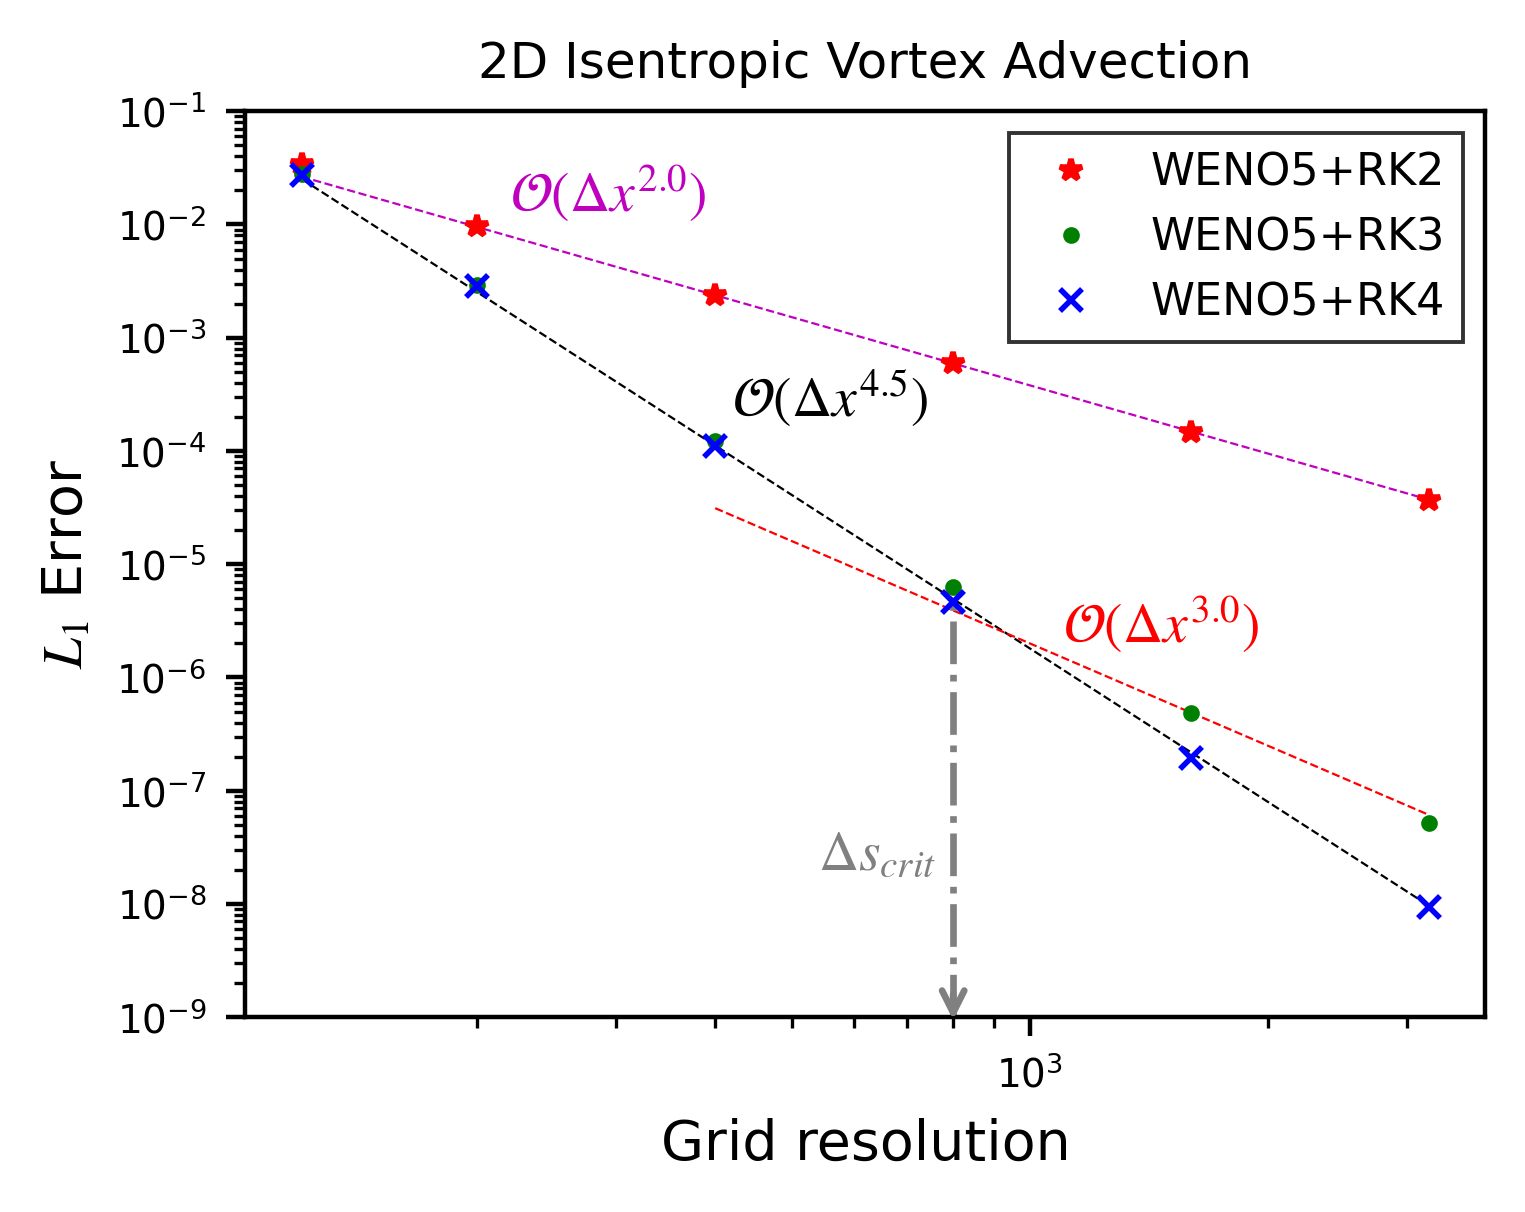

In [3]:
fig = plt.figure(figsize=(4,3), dpi=400)
ax = fig.add_subplot(1,1,1)

line_order = 4.5

ax.plot(NN, (b*a**line_order)*(NN)**(-line_order), 'k--', linewidth=0.4)
ax.annotate(r'$\mathcal{{O}} (\Delta x^{{{}}})$'.format(line_order), xy=(4.2E2,2.E-4))


# additional line
line_order2 = 3.0

ax.plot(NN[2:], (b2*a2**line_order2)*(NN[2:])**(-line_order2), 'r--', linewidth=0.4)
ax.annotate(r'$\mathcal{{O}} (\Delta x^{{{}}})$'.format(line_order2), xy=(1.1E3,2.E-6), color='r')

# (more) additional line
line_order3 = 2.0

ax.plot(NN, (b3*a3**line_order3)*(NN)**(-line_order3), 'm--', linewidth=0.4)
ax.annotate(r'$\mathcal{{O}} (\Delta x^{{{}}})$'.format(line_order3), xy=(2.2E2,1.3E-2), color='m')


# vertical line
ax.plot((NN[3], NN[3]), (1.E-9, weno5_rk4["dens"][NN[3]]), linestyle='dashdot', color='grey', markersize=4, linewidth=1.2)
# this draw an arrow head
# should be separated with vertical line due to the linestyle
ax.annotate("", xytext=(NN[3], .75E-9), xy=(NN[3], 2.E-9), arrowprops=dict(arrowstyle="<-, head_length=0.4, head_width=0.2", linewidth=1.2, color='grey') )

ax.annotate(r'$\Delta s_{crit}$', xy=(5.4E2,2.E-8), color='grey')


ax.plot(weno5_rk2['dens'], 'r*', markersize=4, linewidth=0.5, label='WENO5+RK2')
ax.plot(weno5_rk3['dens'], 'g.', markersize=4, linewidth=0.5, label='WENO5+RK3')
ax.plot(weno5_rk4['dens'], 'bx', markersize=4, linewidth=0.5, label='WENO5+RK4')


ax.loglog()

# ax.set_xlim(1.E1, 1.5E3)
ax.set_ylim(1.E-9, 1.E-1)

legend = ax.legend(fontsize=8, numpoints=1, fancybox=False, edgecolor='k')
legend.get_frame().set_linewidth(.7)

ax.tick_params(axis='both', which='both', labelsize=7)
ax.set_title('2D Isentropic Vortex Advection', fontsize=9)

ax.set_xlabel('Grid resolution')
ax.set_ylabel(r'$L_1$' + ' Error')



fig.savefig('./weno5_vortex_error_sat.pdf', bbox_inches='tight', pad_inches=0.15)